# Linear Regression Model 1: All Features

In [1]:
# read csv into DataFrame
# import pandas for data manipulation
import pandas as pd

df = pd.read_csv('medical_prepared_data.csv', index_col=0)

In [2]:
# install statsmodels
# !pip install statsmodels

In [3]:
# read csv into DataFrame
# import pandas for data manipulation
import pandas as pd

# import statsmodels to perform linear regression
import statsmodels.api as sm
 
# define the variables
x = df.drop(columns='Additional_charges').assign(const=1)
y = df['Additional_charges']
 
# perform the regression and fitting the model
model1 = sm.OLS(y, x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Additional_charges   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     4457.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:14:23   Log-Likelihood:                -82196.
No. Observations:                9331   AIC:                         1.645e+05
Df Residuals:                    9298   BIC:                         1.647e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Population                              0.0006      0.001      0.414      0.679      -0.002       0.003
Children                               18.4695      8.863      2.084      0.037       1.095      35.844
Age                                   225.5985      0.816    276.420      0.000     223.999     227.198
Income                                  0.0002      0.001      0.256      0.798      -0.001       0.001
VitD_levels                           -12.9507      8.472     -1.529      0.126     -29.558       3.656
Doc_visits                            -11.1326     16.190     -0.688      0.492     -42.868      20.603
Full_meals_eaten                       22.9622     17.219      1.334      0.182     -10.790      56.715
vitD_supp                               9.6960     28.743      0.337      0.736     -46.647      66.039
Soft_drink                             13.0740     38.464      0.340      0.734     -62.324      88.472
HighBlood                            8630.6336     34.242    252.047      0.000    8563.511    8697.756
Stroke                                357.1042     42.045      8.493      0.000     274.687     439.522
Complication_risk                     272.9873     23.054     11.841      0.000     227.797     318.178
Overweight                             58.1587     37.094      1.568      0.117     -14.553     130.871
Arthritis                             -64.1156     35.101     -1.827      0.068    -132.922       4.691
Diabetes                               47.2134     37.734      1.251      0.211     -26.753     121.179
Hyperlipidemia                         -4.7020     35.630     -0.132      0.895     -74.544      65.140
BackPain                              -23.2197     34.275     -0.677      0.498     -90.406      43.966
Anxiety                                25.7995     35.949      0.718      0.473     -44.669      96.268
Allergic_rhinitis                       2.4874     34.425      0.072      0.942     -64.994      69.969
Reflux_esophagitis                     26.4276     34.214      0.772      0.440     -40.640      93.495
Asthma                                 62.1308     37.058      1.677      0.094     -10.512     134.773
Marital_Married                        46.2187     53.396      0.866      0.387     -58.450     150.887
Marital_Never Married                  44.6879     53.778      0.831      0.406     -60.729     150.105
Marital_Separated                       8.3781     53.603      0.156      0.876     -96.696     113.452
Marital_Widowed                        15.5964     53.210      0.293      0.769     -88.707     119.900
Gender_Male                           156.7706     34.020      4.608      0.000      90.084     223.457
Gender_Nonbinary                       28.9380    118.203      0.24

## Evaluation

In [4]:
# evaluate model
from statsmodels.tools.eval_measures import rmse

# generate predictions
y_pred = model1.predict(x)

# calculate RMSE
RMSE1 = rmse(y, y_pred)
RMSE1

1619.679345691746

In [5]:
# install tabulate
# !pip install tabulate

In [6]:
# calculate VIF to detect multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import tabulate to view results
import tabulate

# create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
vif_data

,feature,VIF
0,Population,1.002979
1,Children,1.003222
2,Age,1.004033
3,Income,1.002950
4,VitD_levels,1.004465
5,Doc_visits,1.003769
6,Full_meals_eaten,1.005218
7,vitD_supp,1.004086
8,Soft_drink,1.004003
9,HighBlood,1.003691


# Linear Regression Model 2: Reduced Features

In [31]:
# import packages from scikit-learn for feature reduction
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# re-define independent variables
x = df.drop(columns='Additional_charges')

# linear regression estimator to be used in feature selection
reg = LinearRegression().fit(x, y)

In [32]:
# reduce features using SequentialFeatureSelector
sfs = SequentialFeatureSelector(reg, n_features_to_select=2)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=2)

In [33]:
# return selected features
sfs.get_feature_names_out()

array(['Age', 'HighBlood'], dtype=object)

In [46]:
# reduce x to selected features
x = df[['Age', 'HighBlood']].assign(const=1)

In [47]:
# re-perform linear regression 
# perform the regression and fitting the model
model2 = sm.OLS(y, x).fit() 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Additional_charges   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 6.767e+04
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:42:36   Log-Likelihood:                -82439.
No. Observations:                9331   AIC:                         1.649e+05
Df Residuals:                    9328   BIC:                         1.649e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age          225.5933      0.835    270.271      0.000     223.957     227.229
HighBlood   8645.6055     35.026    246.831      0.000    8576.946    8714.265
const      -2673.7164     49.823    -53.664      0.000   -2771.380   -2576.053
==============================================================================
Omnibus:                      951.668   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.464
Skew:                          -0.022   Prob(JB):                     2.52e-60
Kurtosis:                       2.161   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation

In [48]:
# re-evaluate model
# generate predictions
y_pred = model2.predict(x)

# calculate RMSE
RMSE2 = rmse(y, y_pred)
RMSE2

1662.4152991826438

In [49]:
# re-create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
vif_data

,feature,VIF
0,Age,1.000104
1,HighBlood,1.000104
2,const,8.378513


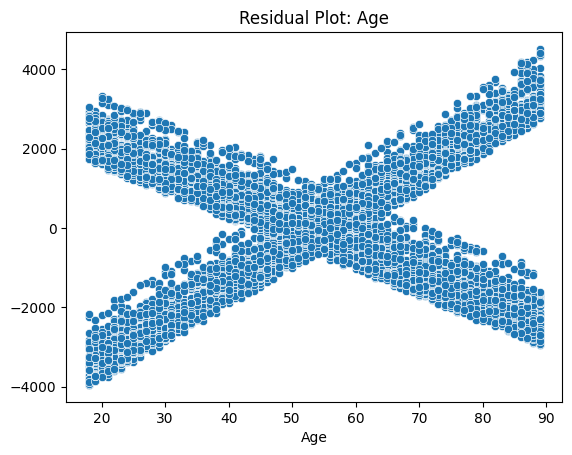

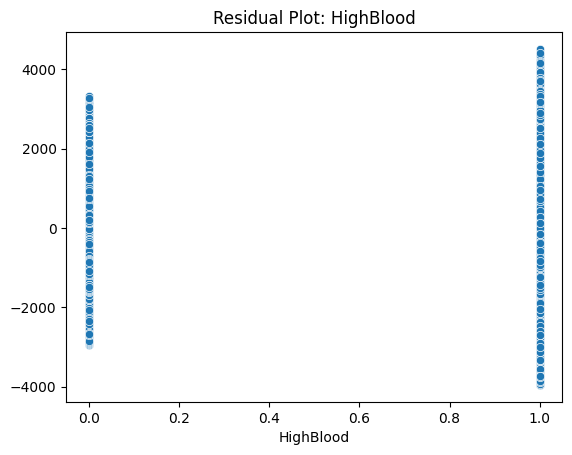

In [50]:
# import matplotlib to create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# create partial residual plots for each predictor variablesns.scatterplot(x=df['Age'], y=model2.resid)
for col in x.drop(columns='const').columns:
    plt.figure()
    sns.scatterplot(x=df[col], y=model2.resid)
    string = 'Residual Plot: ' + str(col)
    plt.title(string)
    plt.show()